<p style="text-align: center; font-weight: bold; font-size:xxx-large; color:green; background-color:#D3EAB9;">Coffee</p>

<img src="Images/coffee_image1.PNG" />

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">Do you ever wonder the significance of all those regions and types printed on bags of coffee?</p>

<p style="text-align: center; font-weight: bold; font-size:large; color:green; background-color:#D3EAB9;">Do any of them truly indicate superior coffee?</p>  

In [119]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_theme(style='darkgrid')
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [96]:
df = pd.read_csv("coffee_region_variety_totals")

In [292]:
df['Outstanding'] = df['Total_Cup_Points'].astype('int64') # a new column created that will indicate if "Outstanding" or not
df.loc[df["Outstanding"]<85, ["Outstanding"]]=0 # A "0" indicates not "Outstanding"
df.loc[df["Outstanding"]>=85, ["Outstanding"]]=1 # A "1" indicates "Outstanding"
df['Outstanding'] = df['Outstanding'].astype(int)

In [293]:
df.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country_of_Origin  1309 non-null   object 
 1   Region             1309 non-null   object 
 2   Variety            1309 non-null   object 
 3   Total_Cup_Points   1309 non-null   float64
 4   Outstanding        1309 non-null   int32  
dtypes: float64(1), int32(1), object(3)
memory usage: 88.5+ KB


In [294]:
df_shuffled = df.sample(frac=1) #this shuffled data set will be split into test and training data
df_train = df_shuffled.head(1114); #1114 is 85% of the dataset
df_test = df_shuffled.tail(196);

In [295]:
aspects = ["aroma", "flavor", "aftertaste", "acidity", "body", "balance", "uniformity", "clean_cup", "sweetness"]

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">The Coffee Quality Institue (https://www.coffeeinstitute.org/) measures these attributes to calculate a total quality score.</p>

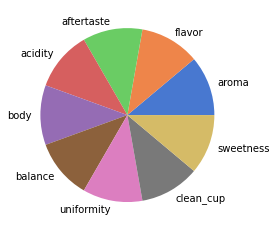

In [296]:
g = [1, 1, 1, 1, 1, 1, 1, 1, 1]
colors = sns.color_palette('muted')
fig, ax = plt.subplots()
ax.pie(g, labels = aspects, colors=colors);

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">Here are the countries represented in the database:</p>

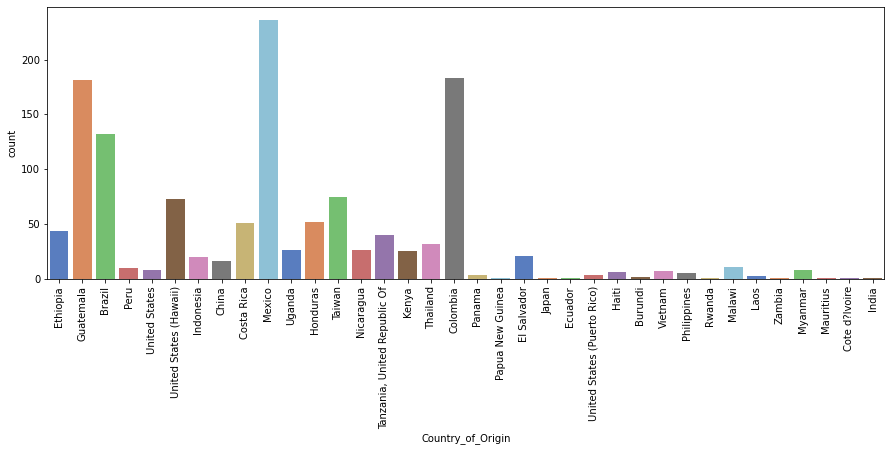

In [297]:
plt.figure(figsize=[15, 5])
plt.subplot(111)
sns.countplot(x='Country_of_Origin', data=df, palette='muted')
plt.xticks(rotation=90);

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">The 40 most represented regions within those countries:</p>

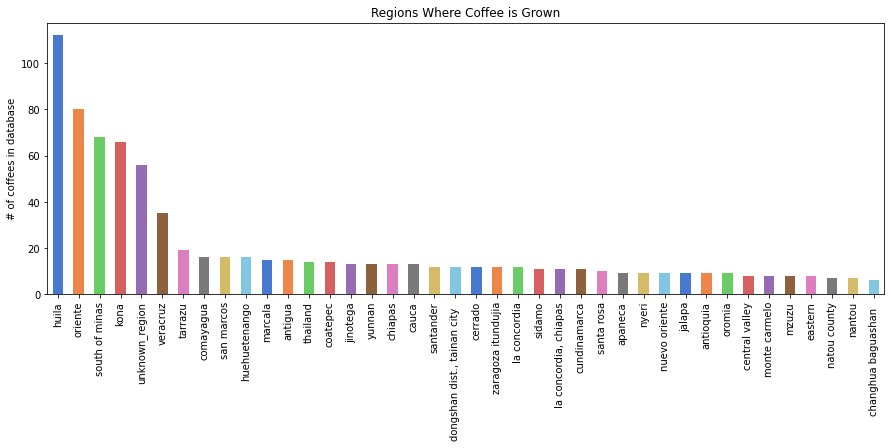

In [298]:
colors = sns.color_palette('muted')
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
df.Region.value_counts().head(40).plot(kind="bar", color = colors, title = 'Regions Where Coffee is Grown', 
                                       ylabel = '# of coffees in database');

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">And these are the top varieties grown:</p>

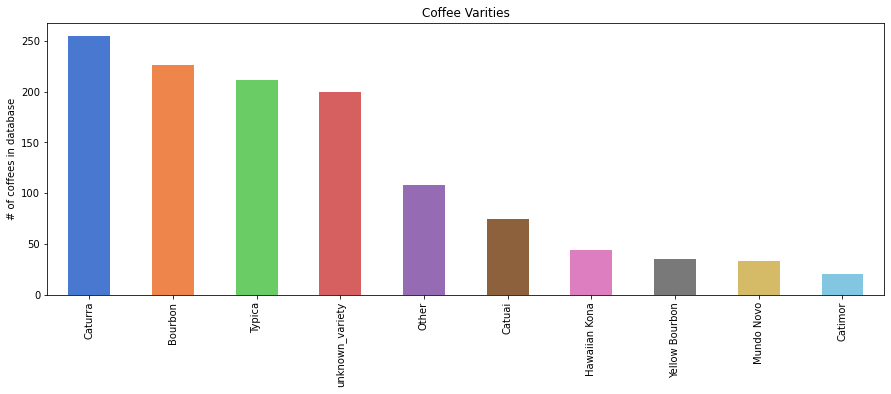

In [299]:
colors = sns.color_palette('muted')
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
df.Variety.value_counts().head(10).plot(kind="bar", color = colors, title = 'Coffee Varities', 
                                        ylabel = '# of coffees in database');

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">A coffee is considered "outstanding" if it scores a total of 85 or higher. This is roughly 10% of coffes tested, like getting an "A" grade in quality.</p>

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">A very few regions produced more than one "Outstanding" coffee in this dataset.</p>


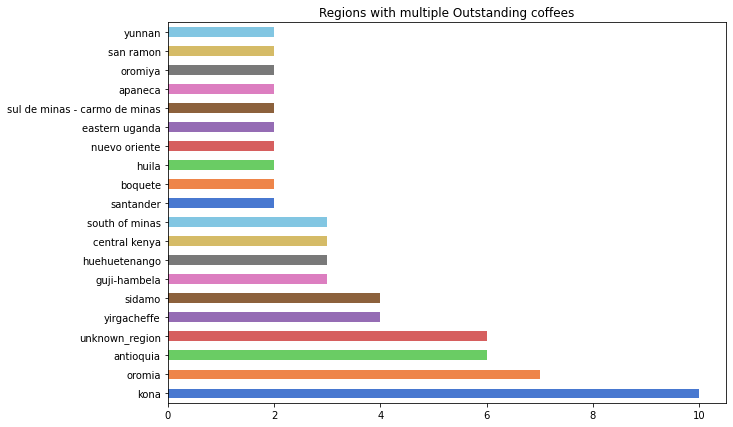

In [300]:
colors = sns.color_palette('muted')
df_outstanding = df[df['Outstanding'] == 1]
df_outstanding_top = df_outstanding.Region.value_counts().head(20)
df_outstanding_top.plot(kind = 'barh', color = colors, sort_columns = True, figsize = (10, 7), 
                        title = 'Regions with multiple Outstanding coffees');

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">The "outstanding" variety appears to differ according to the country. Perhaps these are the varities best suited to their climate.</p>

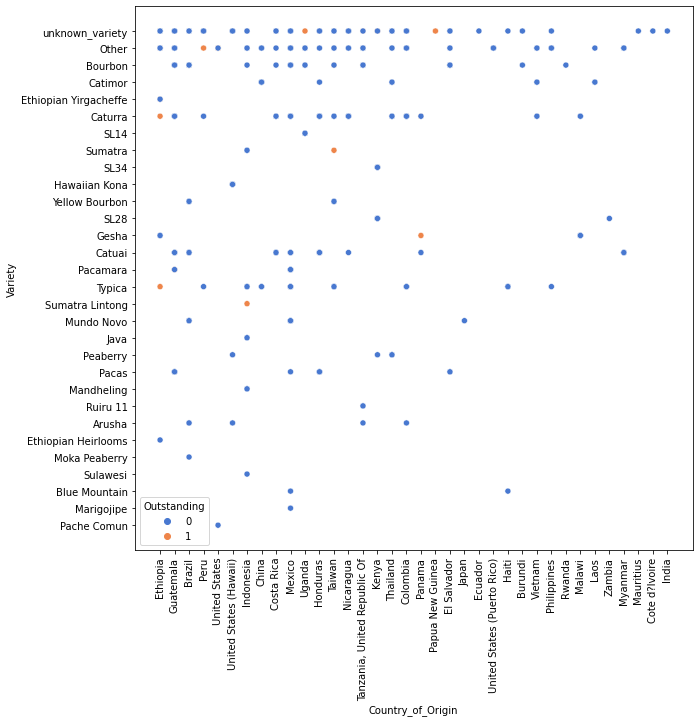

In [301]:
plt.figure(figsize=[10, 10])
plt.subplot(111)
sns.scatterplot(data=df, x='Country_of_Origin', y='Variety', hue='Outstanding', palette='muted')
plt.xticks(rotation=90);

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">While most varities vary from poor to excellent quality, one outlier is consistently great with a large dataset - the Ethiopian Yirgacheffe .</p>

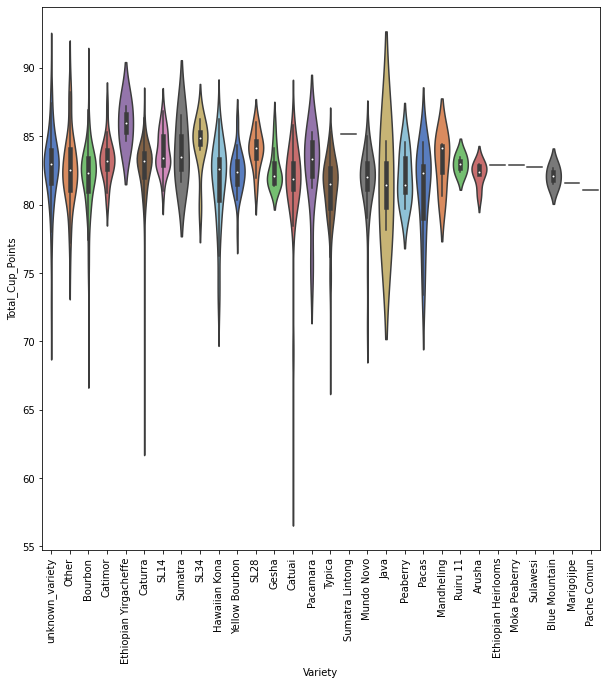

In [302]:
plt.figure(figsize=[10, 10])
plt.subplot(111)
sns.violinplot(data=df, x='Variety', y='Total_Cup_Points', palette='muted', scale = 'width')
plt.xticks(rotation=90);